<a href="https://colab.research.google.com/github/z-yasamani/ssl-multiclassificaton/blob/main/Pre_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
from google.colab import files
uploaded = files.upload()

Saving adult_csv.csv to adult_csv.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['adult_csv.csv']))
df.info()
result = df.head(10)
print(result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
   age         workclass  fnlwgt  ... hoursperweek  native-country income
0    2         Stat

# New Section

In [5]:
df.rename(columns={'education-num': 'education num', 'capitalgain': 'capital gain' 
                   ,'capitalloss': 'capital loss', 'native-country': 'country',
                   'hoursperweek': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [6]:
df.isin(['Nan']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
country           0
income            0
dtype: int64

In [7]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('',np.nan)
df['workclass'] = df['workclass'].replace('',np.nan)
df['occupation'] = df['occupation'].replace('',np.nan)

#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [8]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
1    12074
2    11472
0     8441
3     7936
4     5299
Name: age, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
135601     1
262579     1
145844     1
543162     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
---- education num ---
9     14783
10     9899
13     7570
14     2514
11  

In [9]:
#dropping based on uniquness of data from the dataset 
df.drop(['education num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)
df.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'sex', 'income'],
      dtype='object')

In [10]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
#gender
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2,
                             'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1,
                                   'Married-civ-spouse': 2, 'Separated': 3, 
                                   'Divorced': 4,'Never-married': 5,
                                   'Married-AF-spouse': 6}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,
                                       'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,
                                       'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2,
                                       'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6,
                                       'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9,
                                       'Doctorate': 10, '11th': 11,'Bachelors': 12,
                                       '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2,
                                         'Adm-clerical': 3, 'Handlers-cleaners': 4,
                                         'Prof-specialty': 5,'Machine-op-inspct': 6,
                                         'Exec-managerial': 7,'Priv-house-serv': 8,
                                         'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11,
                                         'Armed-Forces': 12, 'Other-service': 13,
                                         'Protective-serv':14}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1,
                                             'Other-relative': 2, 'Unmarried': 3,
                                             'Husband': 4,'Own-child': 5}).astype(int)

In [11]:
# Shuffle the data

df = df.sample(frac=1, random_state=15).reset_index(drop=True)


# Generate indices for splits

test_ind = round(len(df)*0.2)
train_ind = test_ind + round(len(df)*0.1)
unlabeled_ind = train_ind + round(len(df)*0.7)


# Partition the data

test = df.iloc[:test_ind]
train = df.iloc[test_ind:train_ind]
unlabeled = df.iloc[train_ind:unlabeled_ind]


# Assign data to train, test, and unlabeled sets

X_train = train.drop('income', axis=1)
y_train = train.income

X_unlabeled = unlabeled.drop('income', axis=1)

X_test = test.drop('income', axis=1)
y_test = test.income


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (4522, 7)
y_train dimensions: (4522,)

X_test dimensions: (9044, 7)
y_test dimensions: (9044,)

X_unlabeled dimensions: (31655, 7)


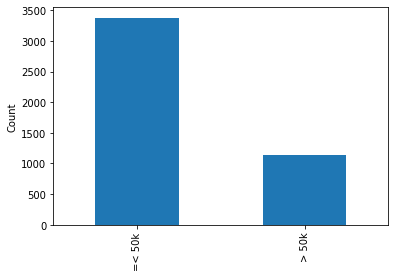

In [12]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['=< 50k', '> 50k'])
plt.ylabel('Count');

Train f1 Score: 0.38439138031450204
Test f1 Score: 0.3872997711670481


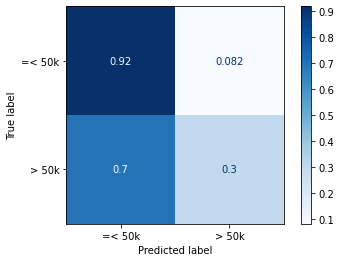

In [13]:
clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)

train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['=< 50k', '> 50k']);

In [14]:
clf.predict_proba(X_test)

array([[0.96156549, 0.03843451],
       [0.587791  , 0.412209  ],
       [0.40110266, 0.59889734],
       ...,
       [0.88358385, 0.11641615],
       [0.92103393, 0.07896607],
       [0.94258938, 0.05741062]])

In [15]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
        
    # Fit classifier and make train/test predictions
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 90% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.9],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.9]],
                          axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 0.38439138031450204
Test f1: 0.3872997711670481
Now predicting labels for unlabeled data...
10559 high-probability predictions added to training data.
21096 unlabeled instances remaining.

Iteration 1
Train f1: 0.3951029493600445
Test f1: 0.39945205479452056
Now predicting labels for unlabeled data...
4511 high-probability predictions added to training data.
16585 unlabeled instances remaining.

Iteration 2
Train f1: 0.425531914893617
Test f1: 0.38431372549019605
Now predicting labels for unlabeled data...
938 high-probability predictions added to training data.
15647 unlabeled instances remaining.

Iteration 3
Train f1: 0.4377952755905512
Test f1: 0.3838326738270209
Now predicting labels for unlabeled data...
338 high-probability predictions added to training data.
15309 unlabeled instances remaining.

Iteration 4
Train f1: 0.4408376963350785
Test f1: 0.3847900113507378
Now predicting labels for unlabeled data...
157 high-probability predictions added to training

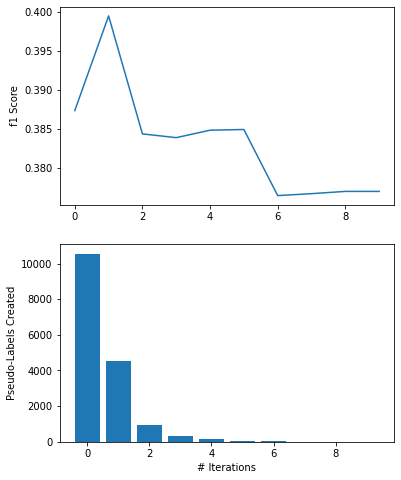

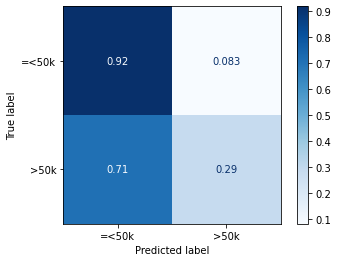

In [16]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');

# View confusion matrix after self-training

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['=<50k', '>50k']);